<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe8-OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del árbol de búsqueda óptimo

**Entrada**:

**Salida**:



# 2. Optimal BST

## 2.1 Código 

### Funciones auxiliares

In [28]:
class Node:
  right = None
  left = None
  key = None
  
  def __init__(self, key):
    self.key = key 

class Tree:
  root = None

  def insert(self, key):
    if self.root == None:
      self.root = Node(key)
      return None, 0

    parent = self.root

    while True:
      if key <= parent.key:
        if parent.left == None:
          parent.left = Node(key)
          return parent, 1
        else:
          parent = parent.left
      
      else:
        if parent.right == None:
          parent.right = Node(key)
          return parent, 2
        else:
          parent = parent.right

In [92]:
import networkx as nx

# Obtenido de https://stackoverflow.com/questions/33439810/

def binary_tree_layout(G, root, width=1., vert_gap = 0.2, vert_loc = 0, 
                       xcenter = 0.5, pos = None, parent = None):
  if pos == None:
    pos = {root:(xcenter,vert_loc)}
  else:
    pos[root] = (xcenter, vert_loc)

  neighbors = list(G.neighbors(root))

  if len(neighbors) != 0:

    dx = width/2.
    leftx = xcenter - dx/2
    rightx = xcenter + dx/2

    for neighbor in neighbors:
      if G.nodes[neighbor]['child_status'] == 'left':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap, 
                                 vert_loc = vert_loc-vert_gap, xcenter=leftx, 
                                 pos=pos, parent = root)
        
      elif G.nodes[neighbor]['child_status'] == 'right':
        pos = binary_tree_layout(G, neighbor, width = dx, vert_gap = vert_gap,
                                 vert_loc = vert_loc-vert_gap, xcenter=rightx,
                                 pos=pos, parent = root)
        
  return pos

In [107]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def visualize_tree(n):
  T = nx.DiGraph()

  tree = Tree()
  for i in range(len(n)):
    parent, pos = tree.insert(n[i])

    if pos == 0 or pos == 1:
      T.add_node(n[i], child_status='left')
    else:
      T.add_node(n[i], child_status='right')

    if parent:
      T.add_edge(parent.key, n[i])

  tree_pos = binary_tree_layout(T, n[0])
  nx.draw(T, tree_pos, with_labels=True, font_size=12, node_size=1000, node_color='white', edgecolors='black')

### Optimal BST (recursivo)

Costo esperado mínimo: 3.12
Llamadas recursivas: 2187


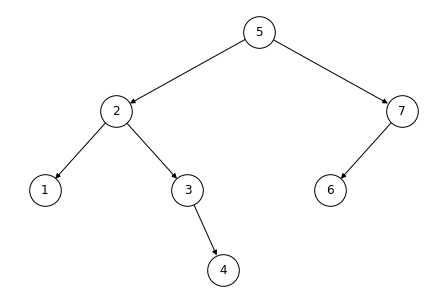

In [134]:
from math import inf

def recursive_optimal_bst(p,q,k,i,j,visualize=True):
  # Contador de llamadas recursivas
  global c
  c = c+1

  # Caso base
  if j < i: return q[i-1], []

  # Nos aseguramos de que e se actualice en la primera iteración
  e = inf

  for r in range(i, j+1):
    # Costo óptimo del subárbol izquierdo
    e_left, t_left = recursive_optimal_bst(p, q, k, i, r-1, False)

    # Costo óptimo del subárbol derecho
    e_right, t_right = recursive_optimal_bst(p, q, k, r+1, j, False)

    # Costo óptimo del árbol con raíz r
    x = e_left + e_right + sum(p[i-1:j]) + sum(q[i-1:j+1])

    # Nos quedamos con el costo mínimo
    if x < e:
      e = x

      # Se reconstruye el árbol
      tree = t_right + t_left
      tree.insert(0,k[r-1])

  # Se dibuja el árbol 
  if visualize:
    visualize_tree(tree)

  return e, tree

c = 0
k = [1, 2, 3, 4, 5, 6, 7]
p = [0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]

e, tree = recursive_optimal_bst(p,q,k,1,len(p),True)

print(f"Costo esperado mínimo: {e}")
print(f"Llamadas recursivas: {c}")

### Optimal BST (bottom-up)

Costo esperado mínimo: 2.75
Subproblemas resueltos: 35


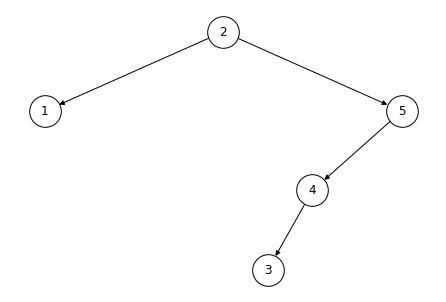

In [138]:
import numpy as np
from math import inf

def optimal_bst(p,q,k,n,visualize=False):
  # Contador de subproblemas
  global s

  # Matriz que almacena el costo mínimo de cada subárbol
  e = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la suma de probabilidades de cada subárbol
  w = np.zeros(shape=(n+2,n+1))

  # Matriz que almacena la raíz óptima de cada subárbol
  root = np.zeros(shape=(n+2,n+2), dtype=int)

  # Valores para búsquedas fallidas
  for i in range(1,n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]

  for k in range(1,n+1):
    for i in range(1,n-k+2):
      j = i+k-1

      # Se calcula la suma de probabilidades para el subárbol i..j
      w[i][j] = w[i][j-1] + p[j-1] + q[j]

      # Nos aseguramos de que e[i][j] se actualice en la primera iteración
      e[i][j] = inf

      for r in range(i,j+1):
        # Costo óptimo del árbol con raíz r
        x = e[i][r-1] + e[r+1][j] + w[i][j]
        s = s+1

        # Nos quedamos con el costo mínimo
        if x < e[i][j]:

          # Guardamos el costo en la matriz e y la raíz en la matriz root
          e[i][j] = x
          root[i][j] = r

  # Se reconstruye y se dibuja el árbol
  if visualize:
    tree = construct_optimal_bst(root, 1, n, k)
    visualize_tree(tree)

  return e[1][n], root

def construct_optimal_bst(root, i, j, k):
  # Caso base
  if i > j:
    return []

  # Raíz del árbol i..j
  r = root[i][j]

  # Obtenemos los nodos de cada subárbol desde la raíz hacia abajo
  t_right = construct_optimal_bst(root, i, r-1, k)
  t_left = construct_optimal_bst(root, r+1, j, k)

  # Juntamos los nodos de cada subárbol e insertamos la raíz de ambos
  tree = t_left + t_right
  tree.insert(0, r)

  return tree
  
s = 0
k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

e, root = optimal_bst(p,q,k,5,visualize=True)

print(f"Costo esperado mínimo: {e}")
print(f"Subproblemas resueltos: {s}")

## 2.2 Descripción del algoritmo

### Subestructura óptima y solución recursiva

### Descripción de la solución (algoritmo recursivo)

### Descripción de la solución (programación dinámica)





## 2.3 Ejemplo


## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos.



# 3. Correctitud

### **Teorema 1: Correctitud de Optimal BST (bottom-up)**

**

## Prueba del Teorema

Para demostrar la correctitud del algoritmo, demostraremos el teorema anterior $P(n)$ utilizando inducción.

**Caso base**

**Paso inductivo**




# 4. Tiempo de ejecución y complejidad espacial

### **Teorema 2: Tiempo de ejecución del algoritmo Optimal BST (bottom-up)**

**

## Prueba del teorema






# 5. Experimentos

## 5.1. Comparación entre implementación recursiva y bottom-up


### Tiempo experimental de Cutting Rod (recursivo)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

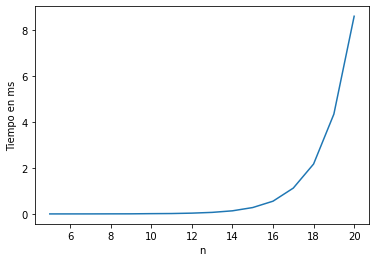

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y1=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental de Cutting Rod (bottom-up)

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,500]$

In [ ]:
x=[]; y1=[];

for n in range(5,501):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo experimental para ambos algoritmos

Para este gráfico, los valores del arreglo $P$ serán generados de forma aleatoria con $n \in [5,20]$

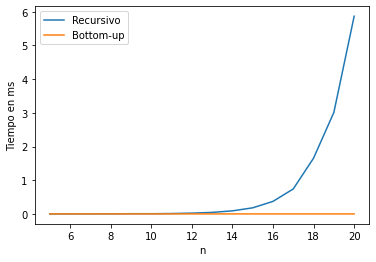

In [ ]:
x=[]; y1=[]; y2=[];

for n in range(5,21):
  P = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import recursive_cutting_rod", stmt=f"recursive_cutting_rod({P}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamic_cutting_rod", stmt=f"dynamic_cutting_rod({P}, {n})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursivo", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar, el tiempo de ejecución del algoritmo recursivo crece a un nivel exponencial, mientras que, la implementación usando programación dinámica es mucho más eficiente, pues sigue una curva cuadrática.

A la hora de comparar ambos algoritmos, podemos notar que el tiempo del algoritmo recursivo predomina totalmente en el gráfico. Esto se debe a la complejidad $O(2^n)$ del algoritmo recursivo, cuya tasa de crecimiento es significativamente mayor que la complejidad $O(n^2)$ del algoritmo bottom-up.


## 5.2. Cantidad de subproblemas (bottom-up)

El siguiente gráfico compara la cantidad de subproblemas $s$ que debe resolver el algoritmo en relación al tamaño del problema, con $n \in [5,500]$

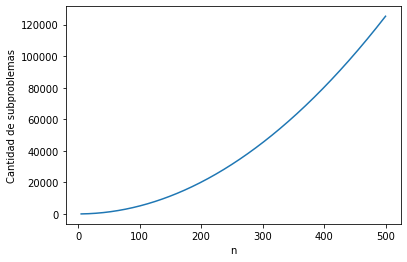

In [ ]:
import matplotlib.pyplot as plt
import random

x = []; y = []; 

for n in range(5,501):
  P = cutrod_instance_generator(n)
  s = 0
  dynamic_cutting_rod(P,n)
  x.append(n)
  y.append(s)

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas')
plt.show()

### Análisis de resultados

Como era de esperarse, la cantidad de subproblemas aumenta cuadráticamente en relación al tamaño del problema $n$. Recordemos que la fórmula para calcular la cantidad de subproblemas es: 

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

Podemos notar fácilmente que esta función posee una complejidad $O(n^2)$, lo cual se ve reflejado en el gráfico.

Algo importante a considerar es que la cantidad de subproblemas a resolver no depende del arreglo de entrada $P$, sino que solo depende del tamaño inicial del problema.

